## Лабораторная работа № 1

## Краткое описание 

### Предметная область

Предметная область: Финансовый анализ, прогнозирование цен на акции, торговля акциями, машинное обучение.

### Источник данных

Источник данных: https://www.kaggle.com/datasets/jvanark/nvidia-daily-stock-price-data/data.  

Характер данных: реальные.

### Атрибуты датасета

Date (дата): Строковый, дата фиксации цены акций.

Open (открытие): Числовой, цена акций в начале торгового дня.
    
High (максимум): Числовой, самая высокая цена акций Nvidia, достигнутая в течение дня.
    
Low (минимум): Числовой, самая низкая цена акций Nvidia, достигнутая в течение дня.

Close (закрытие): Числовой, цена акций в конце торгового дня.

Volume (объем): Числовой, общее количество акций Nvidia, проданных в течение дня.



### Задачи анализа

Анализ трендов: выявление ключевых переломных моментов в ценах на акции Nvidia за 20 лет.

Технический анализ: расчет технических индикаторов (скользящие средние, RSI, полосы Боллинджера, MACD) для лучшего понимания ценовых моделей.

Прогнозирование цен на акции: использование алгоритмов машинного обучения (LSTM, ARIMA) для прогнозирования будущих движений цен.

Тестирование торговых стратегий: моделирование торговых условий с использованием исторических данных для оценки и оптимизации различных стратегий.

## Анализ данных

Сперва откроем файл и убедимся, что все атрибуты присутствуют:

In [140]:
import pandas as pd
from IPython.display import display, HTML

file = pd.read_csv("v1.csv")
file.sample(7)

,Date,Open,High,Low,Close,Volume
1295,2009-02-25,0.20,0.21,0.19,0.20,702360000
1440,2009-09-22,0.38,0.38,0.38,0.38,361388000
2845,2015-04-23,0.55,0.56,0.54,0.56,259380000
928,2007-09-11,0.86,0.87,0.85,0.86,405424000
3254,2016-12-05,2.25,2.32,2.22,2.30,602284000
169,2004-09-03,0.11,0.11,0.11,0.11,715056000
761,2007-01-11,0.58,0.59,0.57,0.58,924504000


### Найхождение числовых характеристик по атрибутам

Определим среднее значение и СКО:

In [144]:
mean_values = file.iloc[:, 1:6].mean()

print("Средние значения для каждого столбца:")
print(mean_values)

Средние значения для каждого столбца:
Open             5.21
High             5.31
Low              5.12
Close            5.22
Volume   558796209.42
dtype: float64


In [146]:
std_devs = file.iloc[:, 1:6].std()

print(f"Вывод СКО для каждого столбца:\n{std_devs}")

Вывод СКО для каждого столбца:
Open             9.64
High             9.81
Low              9.47
Close            9.64
Volume   336340843.03
dtype: float64


In [ ]:
Построим гистограммы распределения значений.

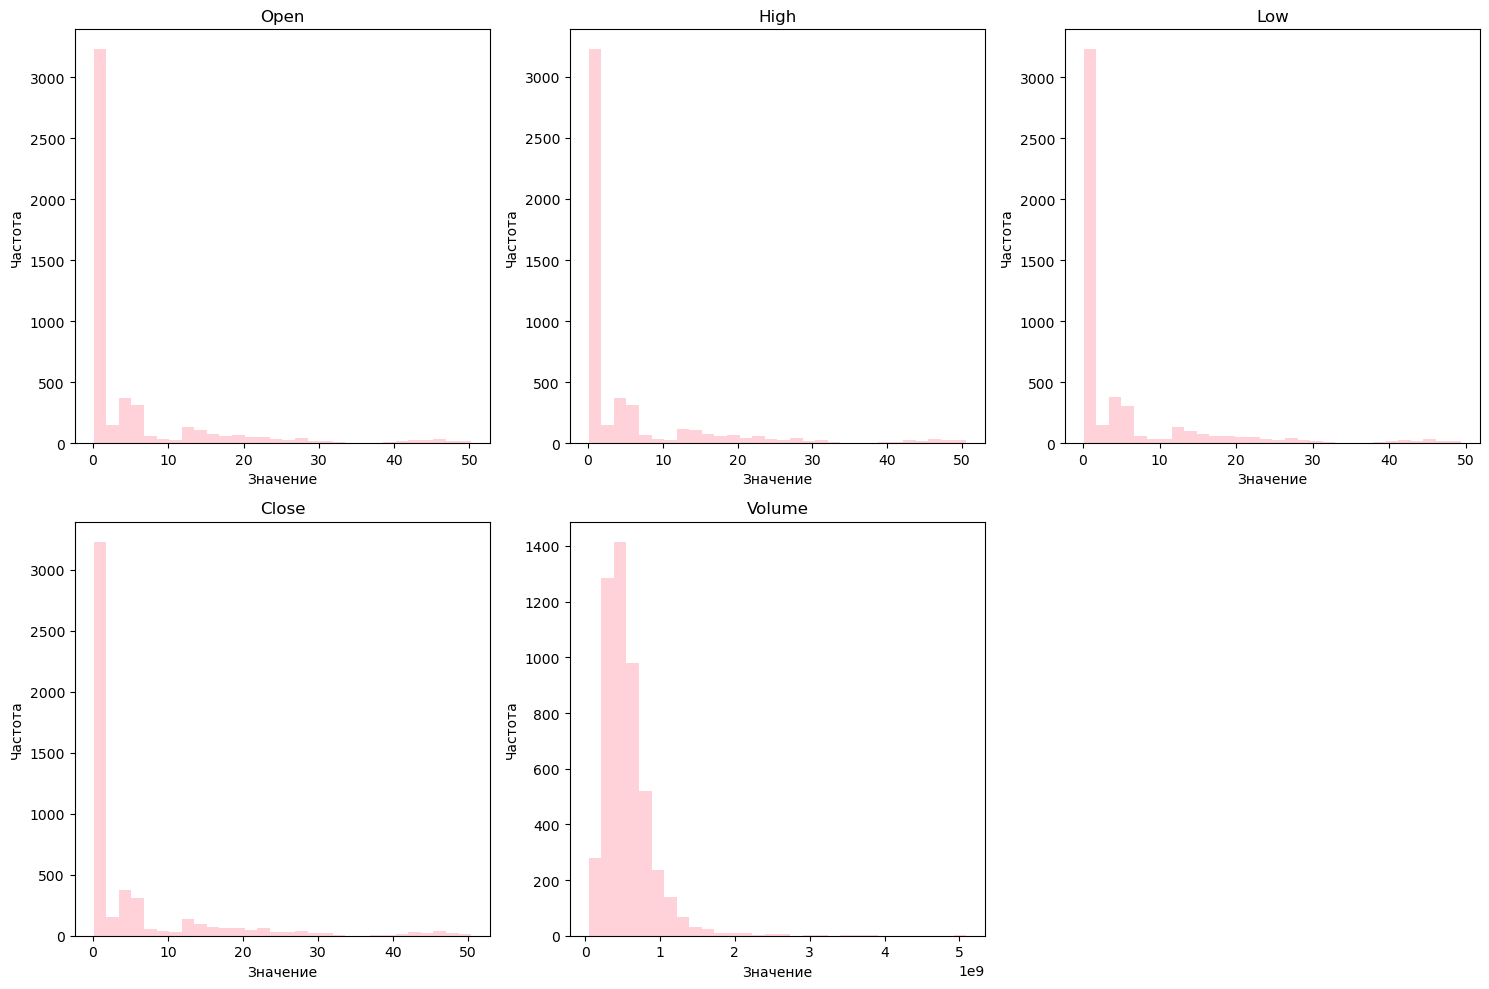

In [303]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

 
for i, column in enumerate(file.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца
    plt.hist(file[column], bins=30, alpha=0.7, color='pink')
    plt.title(column)
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Выбросы будем определять по Z-оценке (Z-score < 1.5)

In [231]:
for attr in file.select_dtypes(include=['float64', 'int64']).columns:
    column_data = file[attr]
    clean_attr = column_data[np.abs(stats.zscore(column_data)) < 1.5]
    
    print(f"Количество строк с выбросами ({attr}): {len(column_data) - len(clean_attr)}")
    print(f"Количество строк без выбросов ({attr}): {len(clean_attr)}")
    print("\n")


Количество строк с выбросами (Open): 429
Количество строк без выбросов (Open): 4604


Количество строк с выбросами (High): 429
Количество строк без выбросов (High): 4604


Количество строк с выбросами (Low): 424
Количество строк без выбросов (Low): 4609


Количество строк с выбросами (Close): 428
Количество строк без выбросов (Close): 4605


Количество строк с выбросами (Volume): 315
Количество строк без выбросов (Volume): 4718




Проверим метаинформацию о датасете и определим, есть ли пропущенные значения.

In [215]:
print("Метаинформация о датасете:")
file.info()

print("Количество пустых полей в каждом столбце:")
print(file.isnull().sum())

Метаинформация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5033 non-null   object 
 1   Open    5033 non-null   float64
 2   High    5033 non-null   float64
 3   Low     5033 non-null   float64
 4   Close   5033 non-null   float64
 5   Volume  5033 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 236.1+ KB
Количество пустых полей в каждом столбце:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
Пропущенных значений не обнаружено.

### Определение корреляции между атрибутами

In [ ]:
Построим матрицу графиков рассеивания.

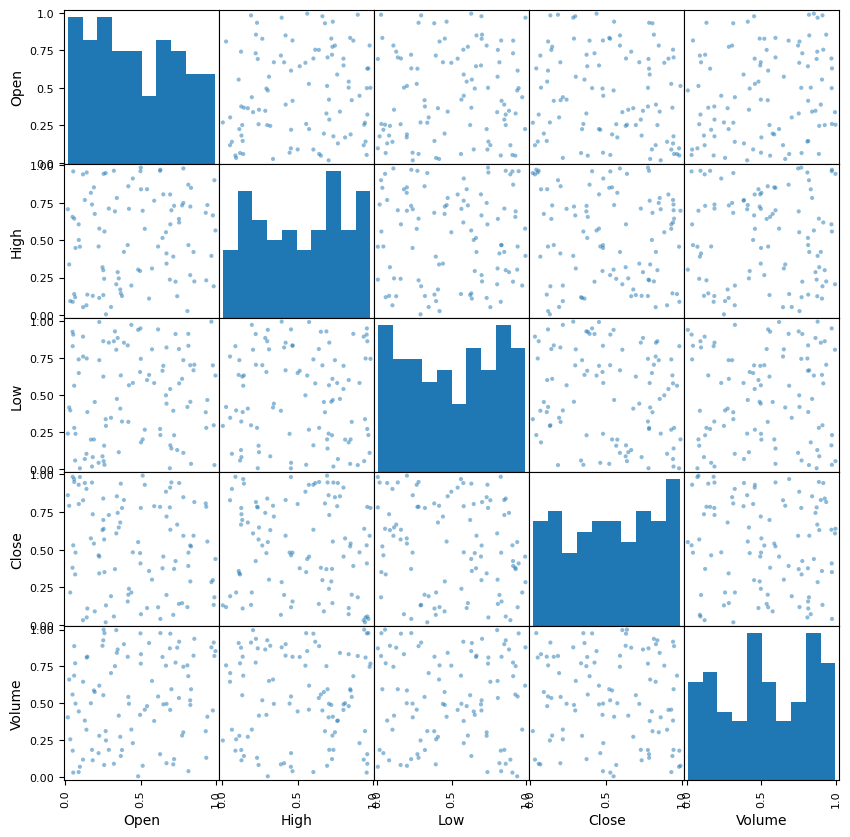

In [327]:
scatter_frame = pd.DataFrame({
    "Open": scalar_attributes[0],
    "High": scalar_attributes[1],
    "Low": scalar_attributes[2],
    "Close": scalar_attributes[3],
    "Volume": scalar_attributes[4],
})


scatter_matrix = pd.plotting.scatter_matrix(
    scatter_frame,
    figsize=(10, 10)
)

plt.show()


Рассмотрим матрицу корреляций.

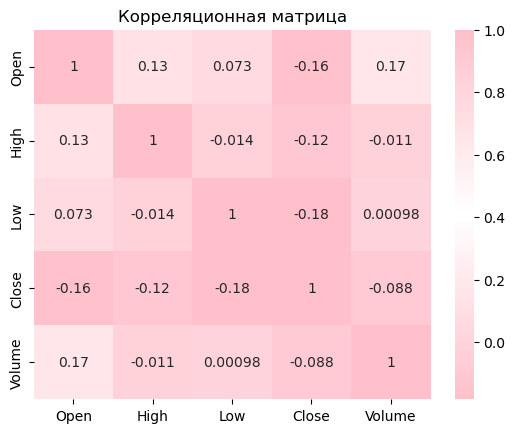

In [343]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('', ['pink', 'white', 'pink'])
heatmap = seaborn.heatmap(
    scatter_frame.corr(),
    annot=True,
    cmap=cmap
)
plt.title('Корреляционная матрица') 
plt.show()

### Анализ корреляций

Высокая корреляция (0.6 < abs(corr) < 1): 

Нет атрибутов с высокой корреляцией.

Средняя корреляция (0.3 < abs(corr) < 0.6):

Нет атрибутов со средней корреляцией.

Низкая корреляция (0,1 < abs(corr) < 0.3):

Open и High (0.13) - прямая корреляция: Это вполне ожидаемо, поскольку максимальная цена (High) в течение торговой сессии обычно превышает цену открытия (Open). Это может указывать на общую тенденцию роста цен в течение дня.

Open и Volume (0.17) - прямая корреляция: Данная связь может свидетельствовать о том, что при увеличении объема торгов (Volume) цены открытия (Open) также имеют тенденцию к росту. Это может означать, что активное участие трейдеров в торгах способствует более высоким ценам открытия.

High и Close (-0.12) - обратная корреляция: Эта связь может указывать на то, что если цена открытия (Open) была высокой, то цена закрытия (Close) может оказаться ниже. Это может быть связано с тем, что после достижения высокой цены трейдеры начинают фиксировать прибыль, что приводит к снижению цен.

Low и Close (-0.18) - обратная корреляция: Похожая зависимость может говорить о том, что если минимальная цена (Low) была низкой, то цена закрытия (Close) имеет шанс быть выше. Это может указывать на восстановление цен после достижения низкого уровня, что часто наблюдается в волатильных рынках.


Отсутствие корреляции:

Все остальные пары атрибутов имеют очень слабую корреляцию, практически отсутствующую. 

Выводы:

Данные по цене открытия (Open), максимуму (High), минимуму (Low) и объему (Volume) демонстрируют слабую корреляцию между собой. 
Наблюдаются  небольшие связи между Open и High, Open и Volume.
Имеется слабая обратная корреляция между High и Close, Low и Close.
